# Explore here

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")

folder = "my_data"
filename = "diabetes.csv"
file_path = os.path.join(folder, filename)

os.makedirs(folder, exist_ok=True)

data.to_csv(file_path, index=False)

betes = pd.DataFrame(data)

betes.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
betes.shape

(768, 9)

In [3]:
betes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


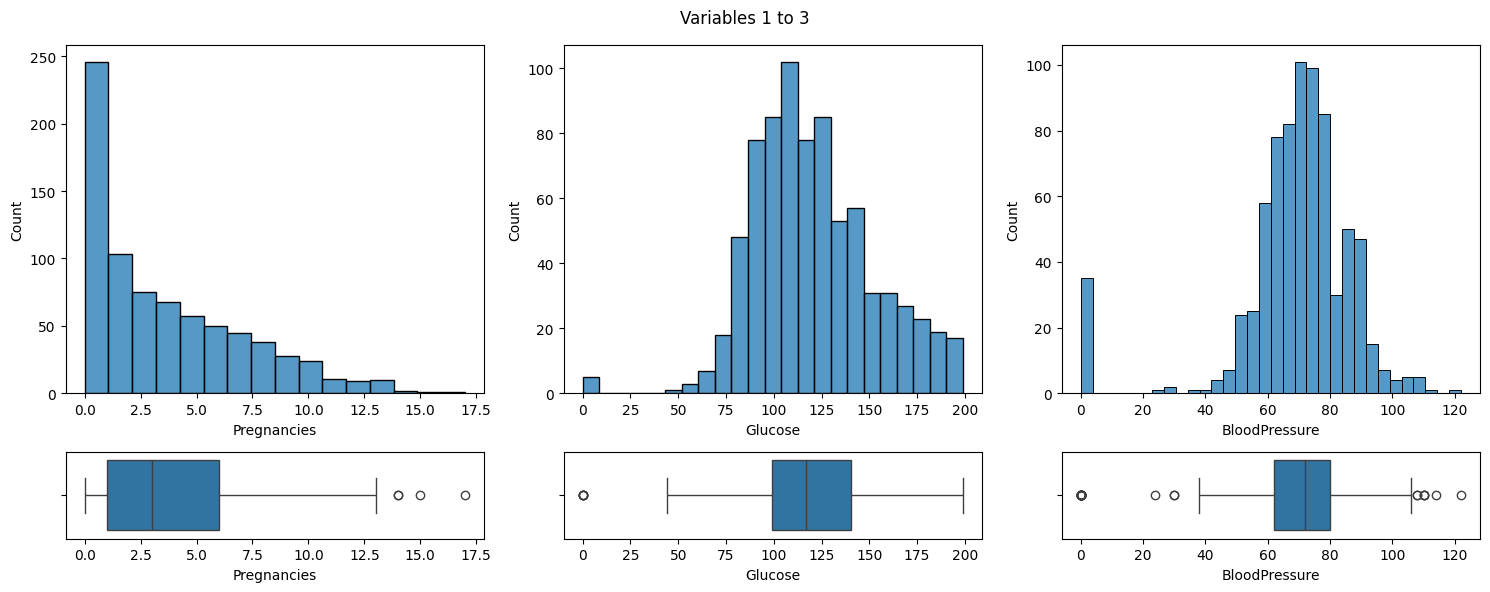

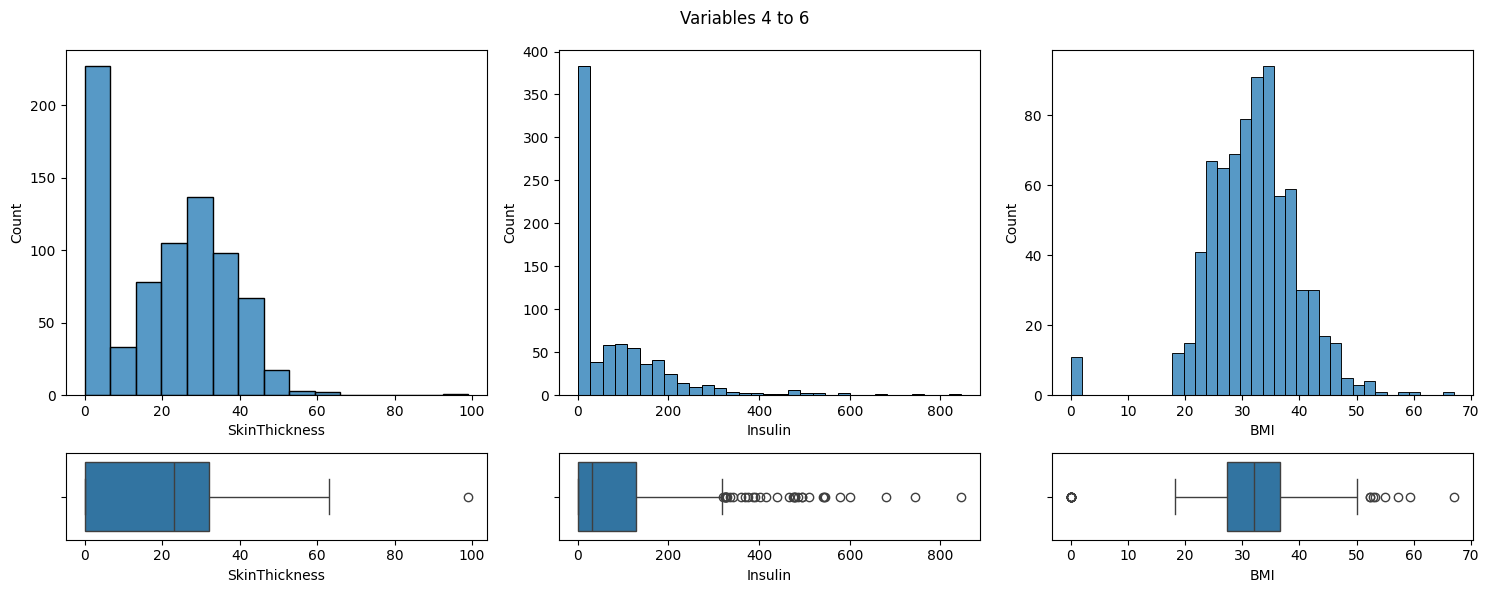

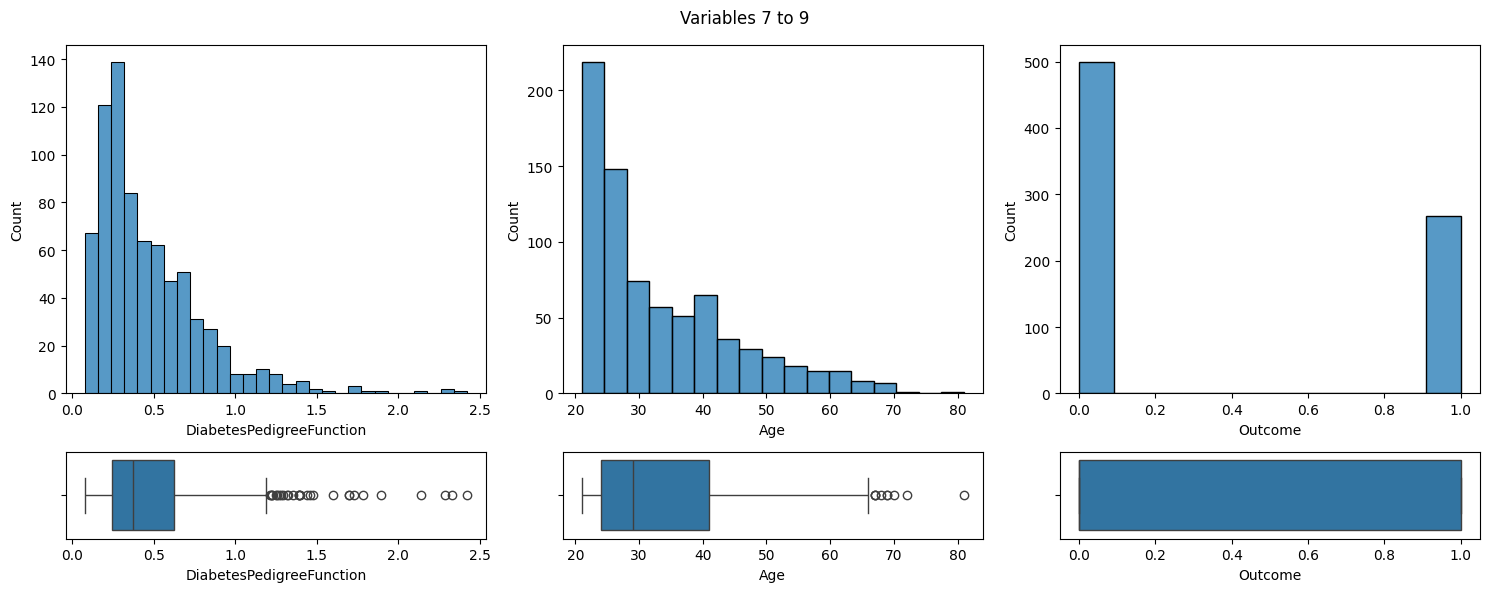

In [4]:

columns = betes.columns
batch_size = 3

# Loop in batches of 3
for start in range(0, len(columns), batch_size):
    end = min(start + batch_size, len(columns))
    batch_cols = columns[start:end]

    fig, axis = plt.subplots(2, len(batch_cols), figsize=(5 * len(batch_cols), 6), 
                             gridspec_kw={"height_ratios": [4, 1]})

    for i, col in enumerate(batch_cols):
        sns.histplot(ax=axis[0, i], data=betes, x=col)
        sns.boxplot(ax=axis[1, i], data=betes, x=col)

    fig.suptitle(f"Variables {start + 1} to {end}")
    plt.tight_layout()
    plt.show()

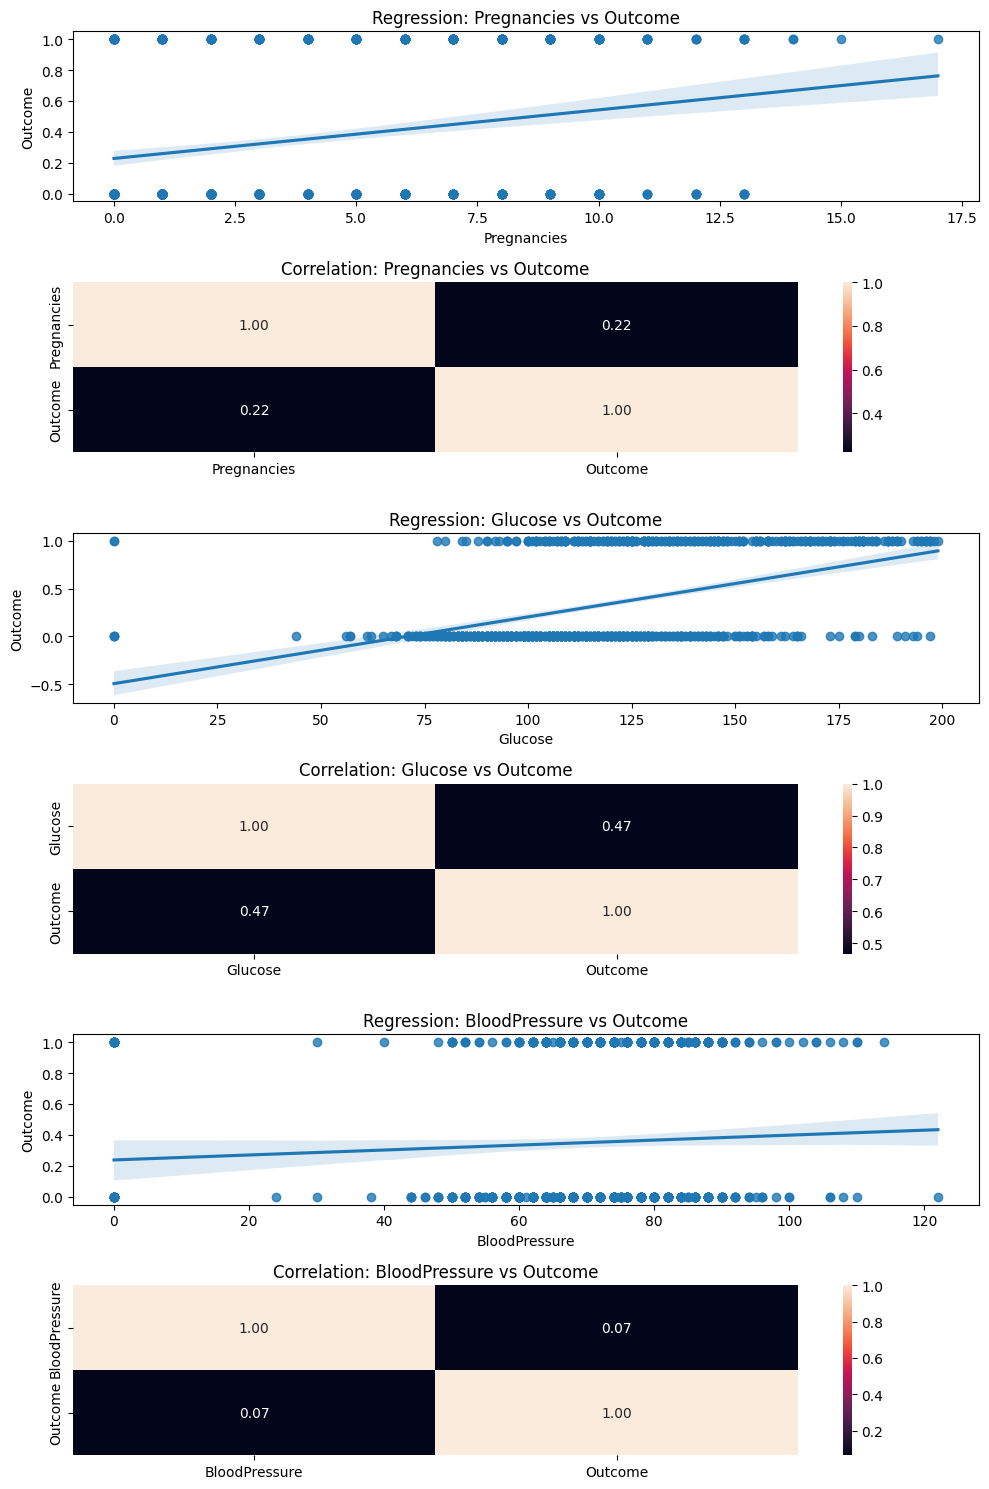

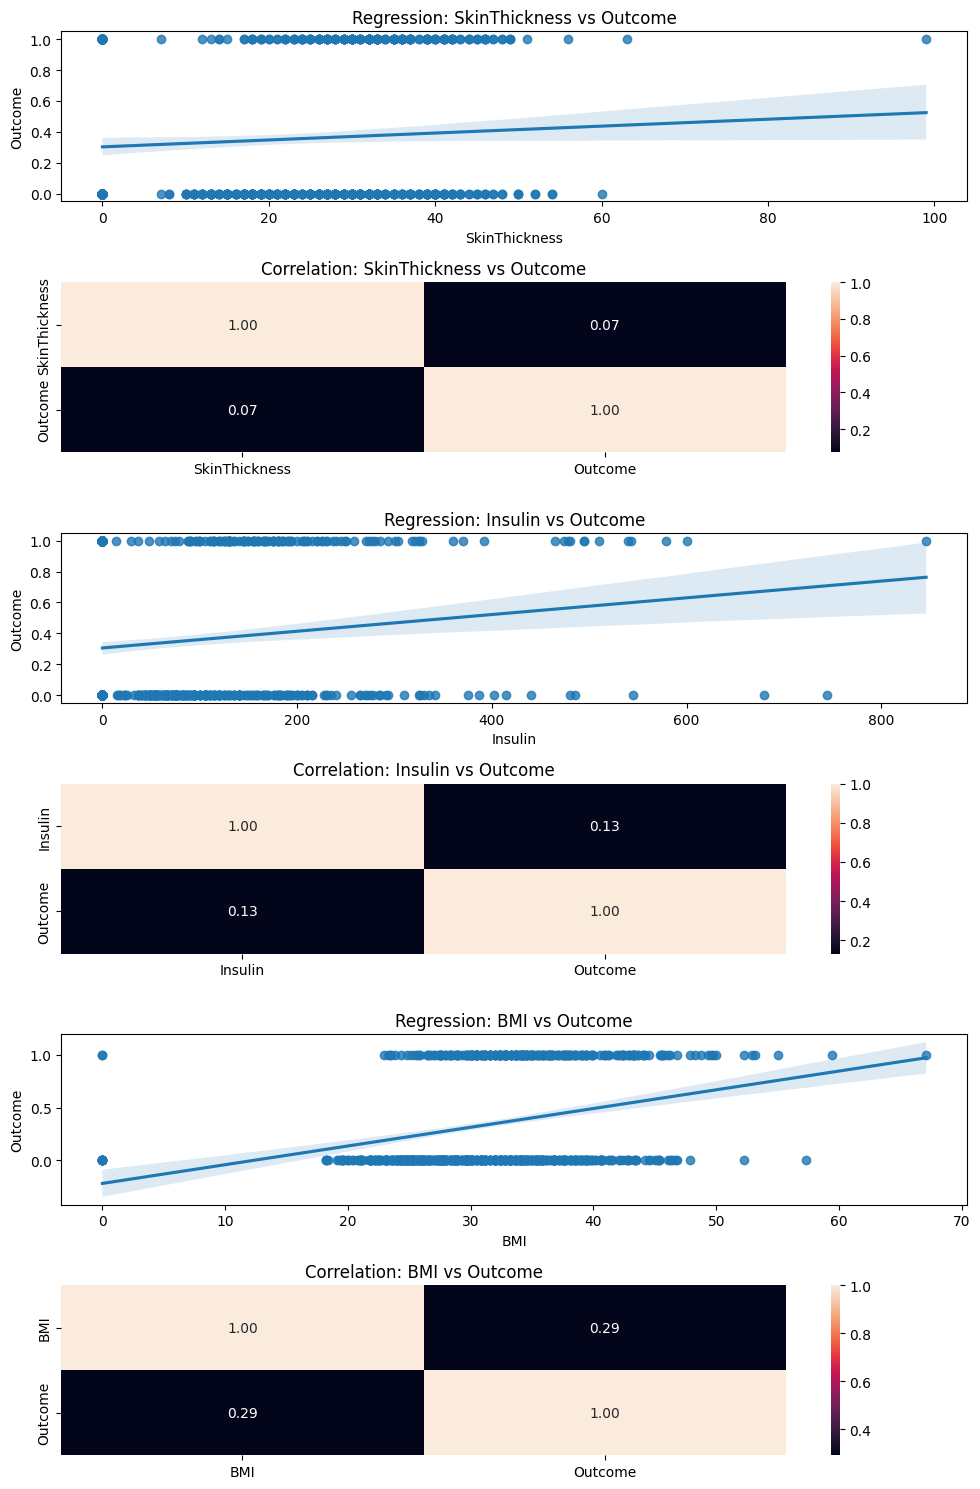

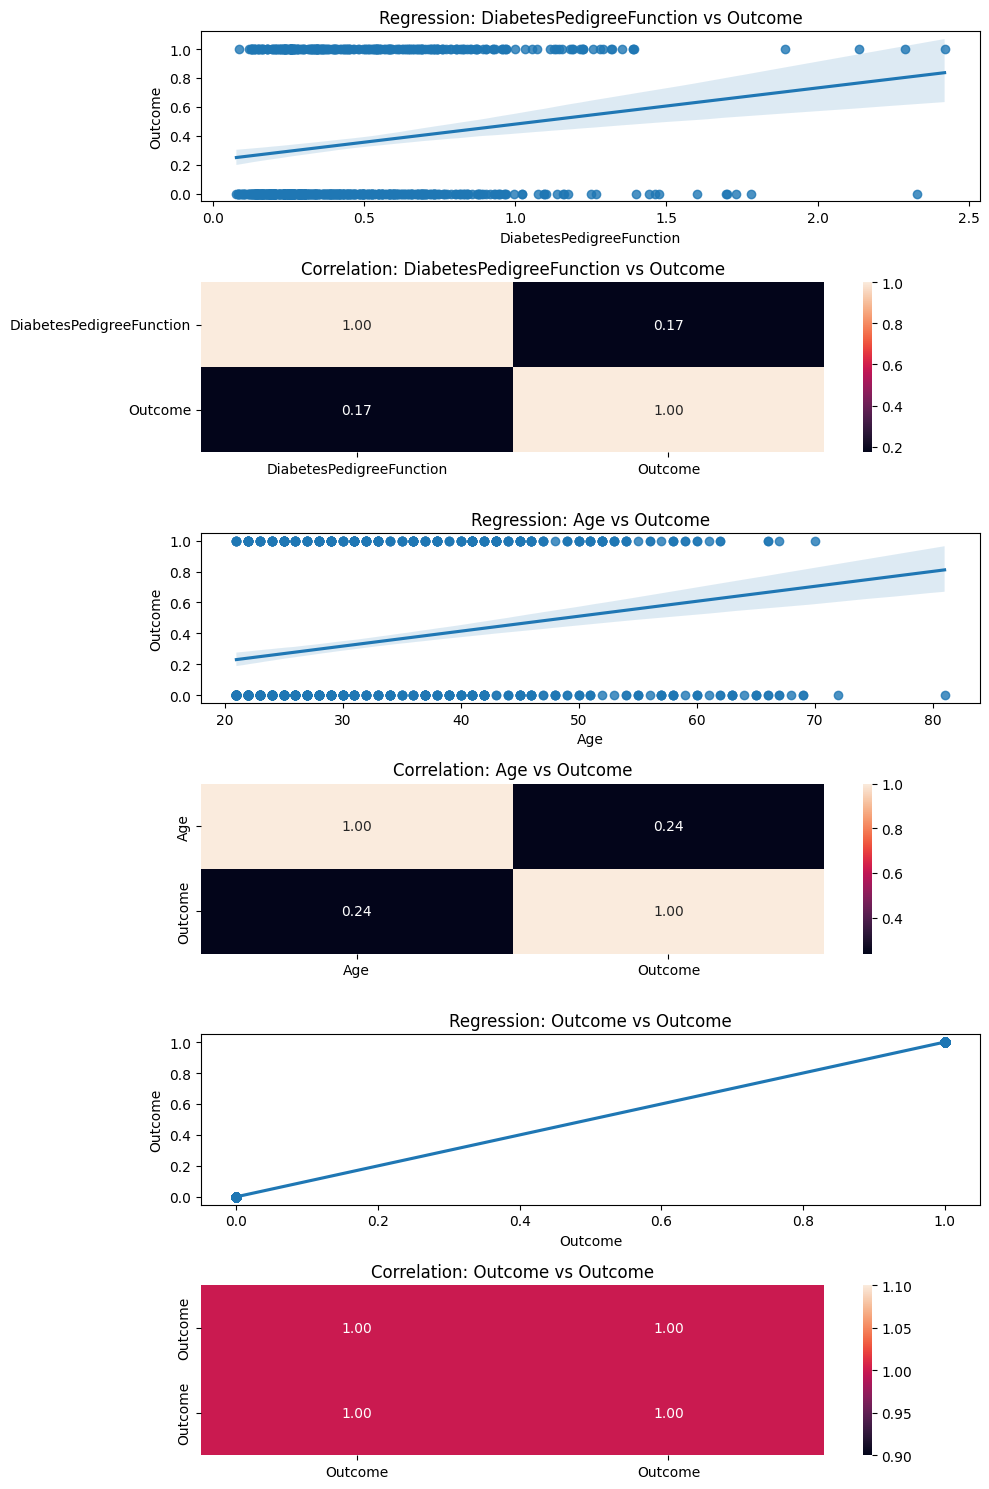

In [5]:
batch_size = 3
target = "Outcome"

# Loop in batches of 3 columns
for start in range(0, len(columns), batch_size):
    end = min(start + batch_size, len(columns))
    batch_cols = columns[start:end]

    fig, axis = plt.subplots(2 * len(batch_cols), 1, figsize=(10, 5 * len(batch_cols)))

    for i, col in enumerate(batch_cols):
        try:
            # Regression plot
            sns.regplot(ax=axis[2*i],data=betes,x=col,y=target)
            axis[2*i].set_title(f"Regression: {col} vs {target}")

            # Correlation heatmap
            corr = betes[[col, target]].corr()
            sns.heatmap(corr,annot=True,fmt=".2f", ax=axis[2*i + 1])
            axis[2*i + 1].set_title(f"Correlation: {col} vs {target}")

        except Exception as e:
            print(f"⚠️ Error plotting {col}: {e}")

    plt.tight_layout()
    plt.show()

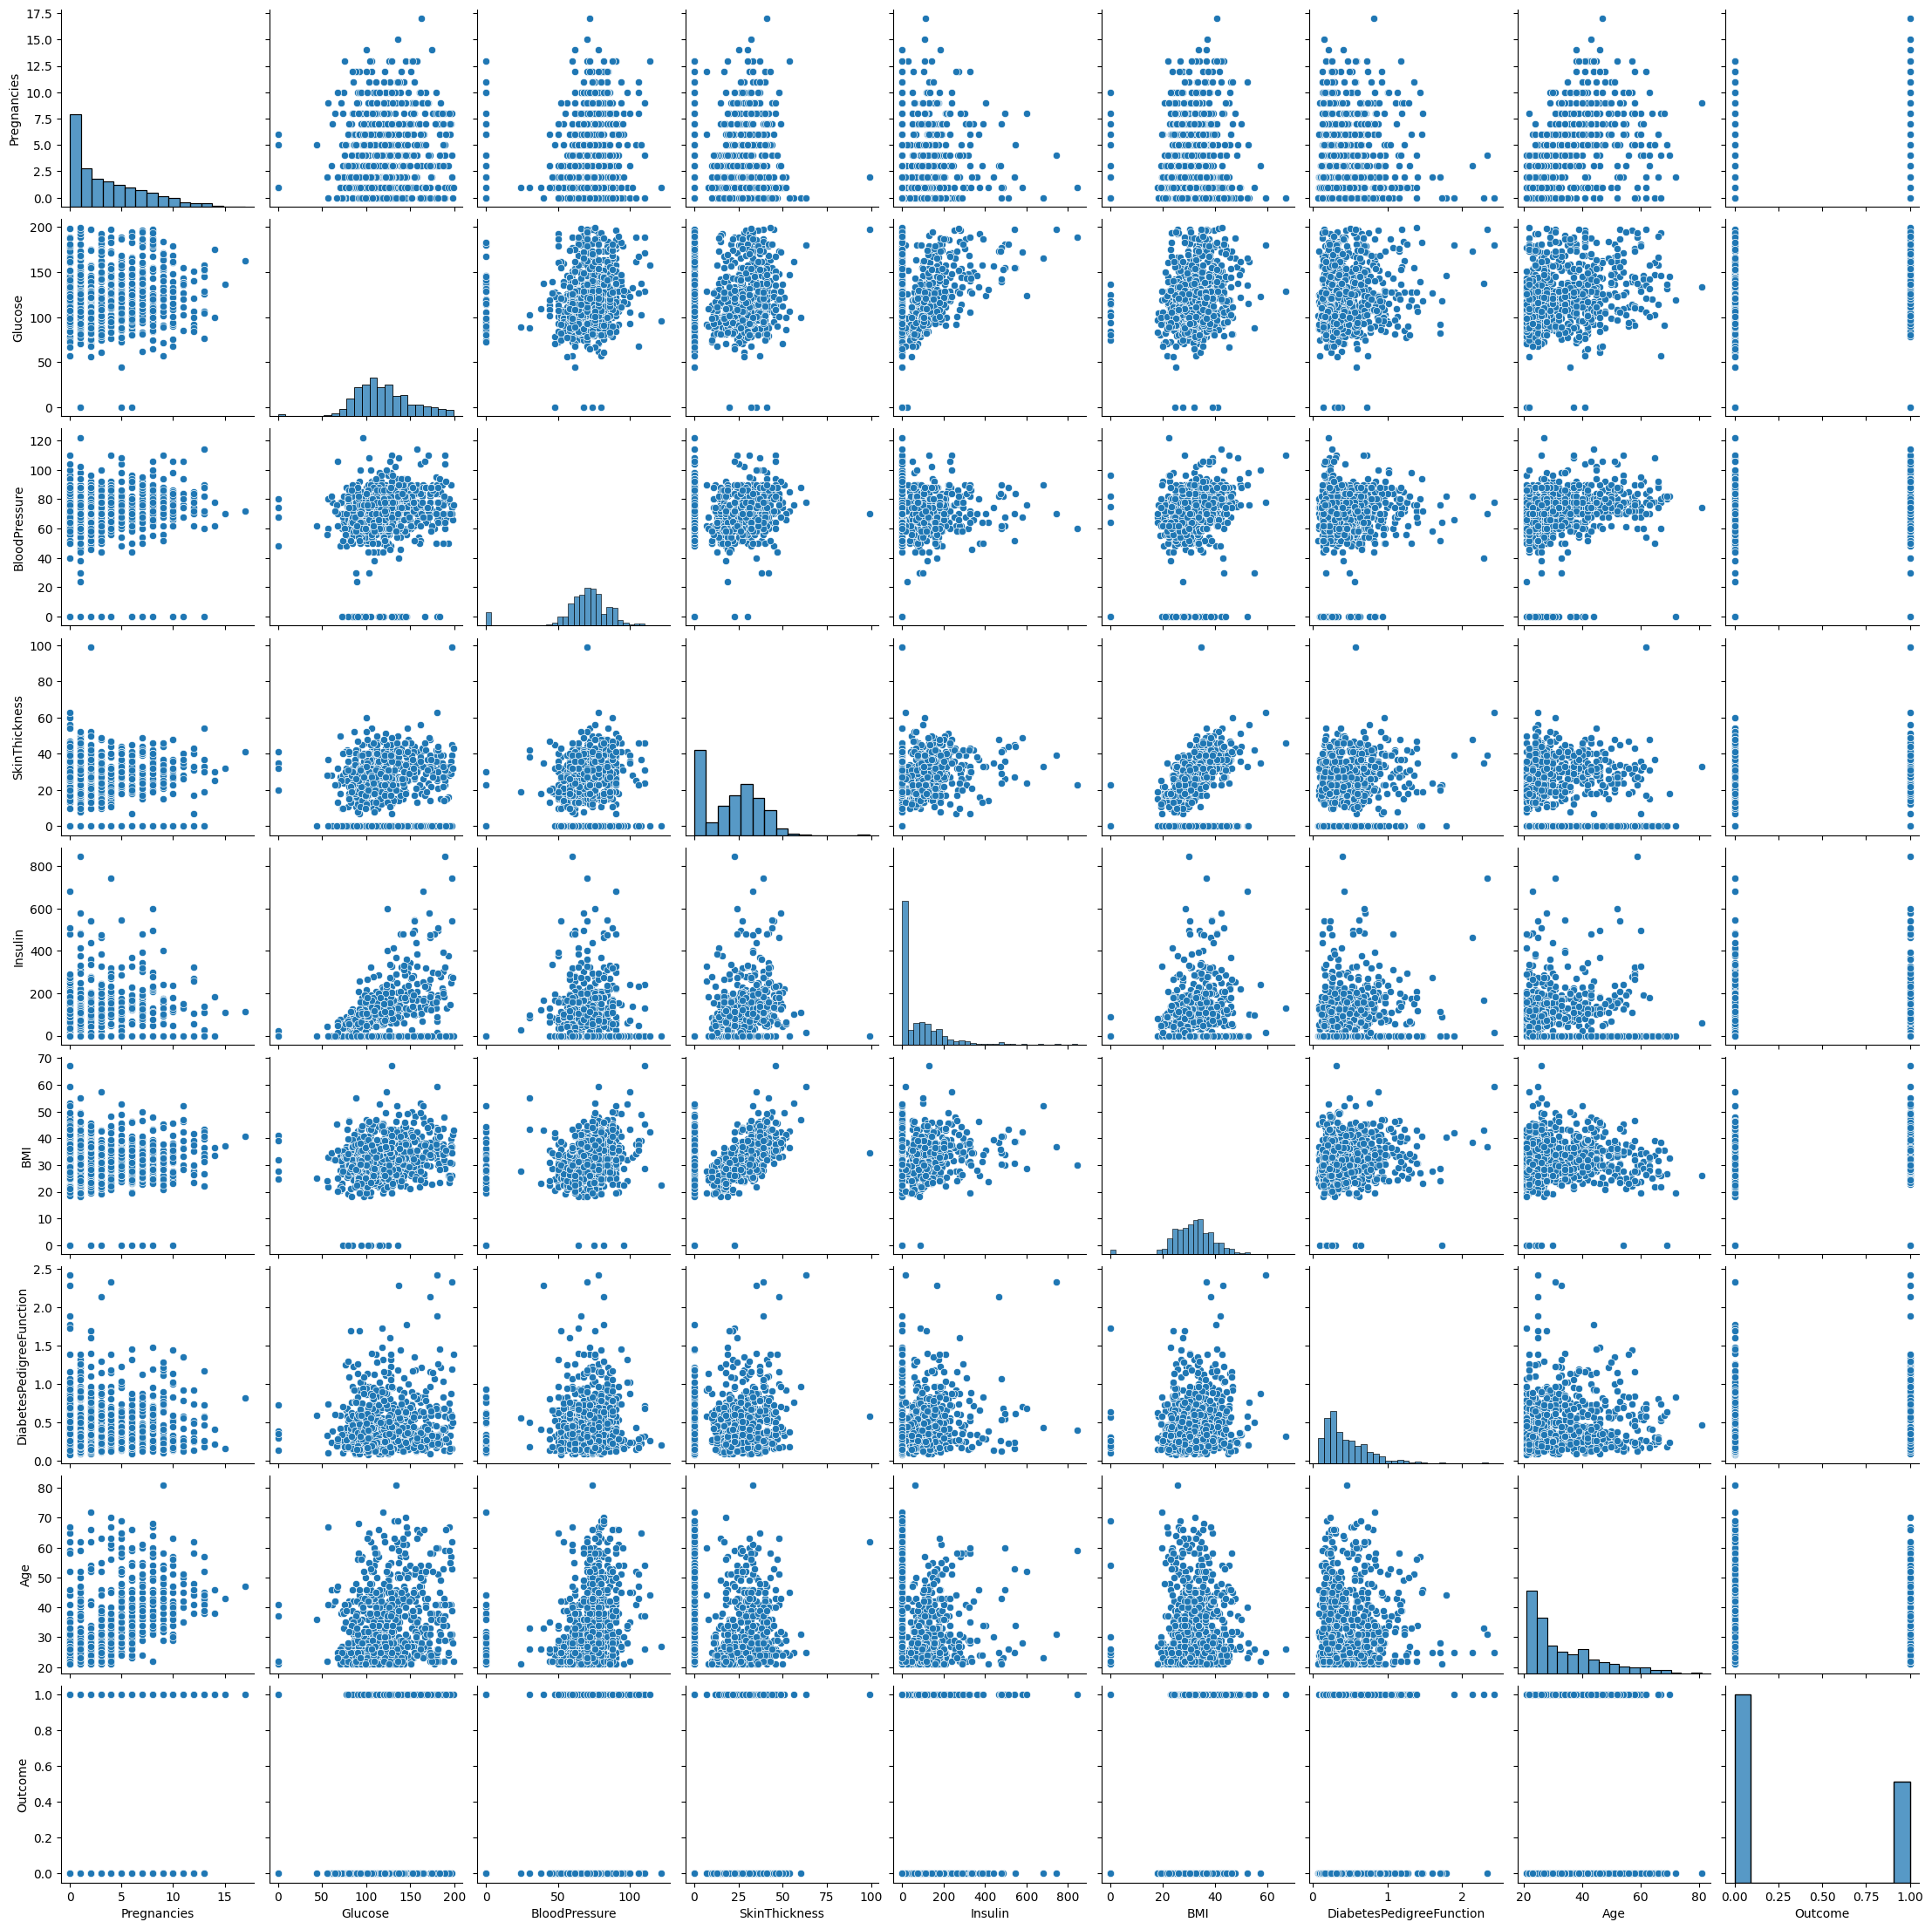

In [6]:
#Analysing all the Data at Once

sns.pairplot(data = betes)

In [7]:

# Clean the outliers

betes = betes[betes["Glucose"] > 0]
betes = betes[betes["BloodPressure"] > 0]
betes = betes[betes["BMI"] > 0]

count_glucose_0 = (betes["Glucose"] == 0).value_counts
count_bp_0 = (betes["BloodPressure"] == 0).value_counts
count_bmi_0 =(betes["BMI"] == 0).value_counts

print("Glucose: ", count_glucose_0)
print("Blood Pressure: ", count_bp_0)
print("BMI: ", count_bmi_0)

Glucose:  <bound method IndexOpsMixin.value_counts of 0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Name: Glucose, Length: 724, dtype: bool>
Blood Pressure:  <bound method IndexOpsMixin.value_counts of 0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Name: BloodPressure, Length: 724, dtype: bool>
BMI:  <bound method IndexOpsMixin.value_counts of 0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Name: BMI, Length: 724, dtype: bool>


In [8]:
# Count NaN

betes.isnull().sum().sort_values(ascending = False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X = betes.drop("Outcome", axis = 1)
y = betes["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
475,0,137,84,27,0,27.3,0.231,59
6,3,78,50,32,88,31.0,0.248,26
450,1,82,64,13,95,21.2,0.415,23
635,13,104,72,0,0,31.2,0.465,38
438,1,97,70,15,0,18.2,0.147,21


In [20]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state = 42)
model.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


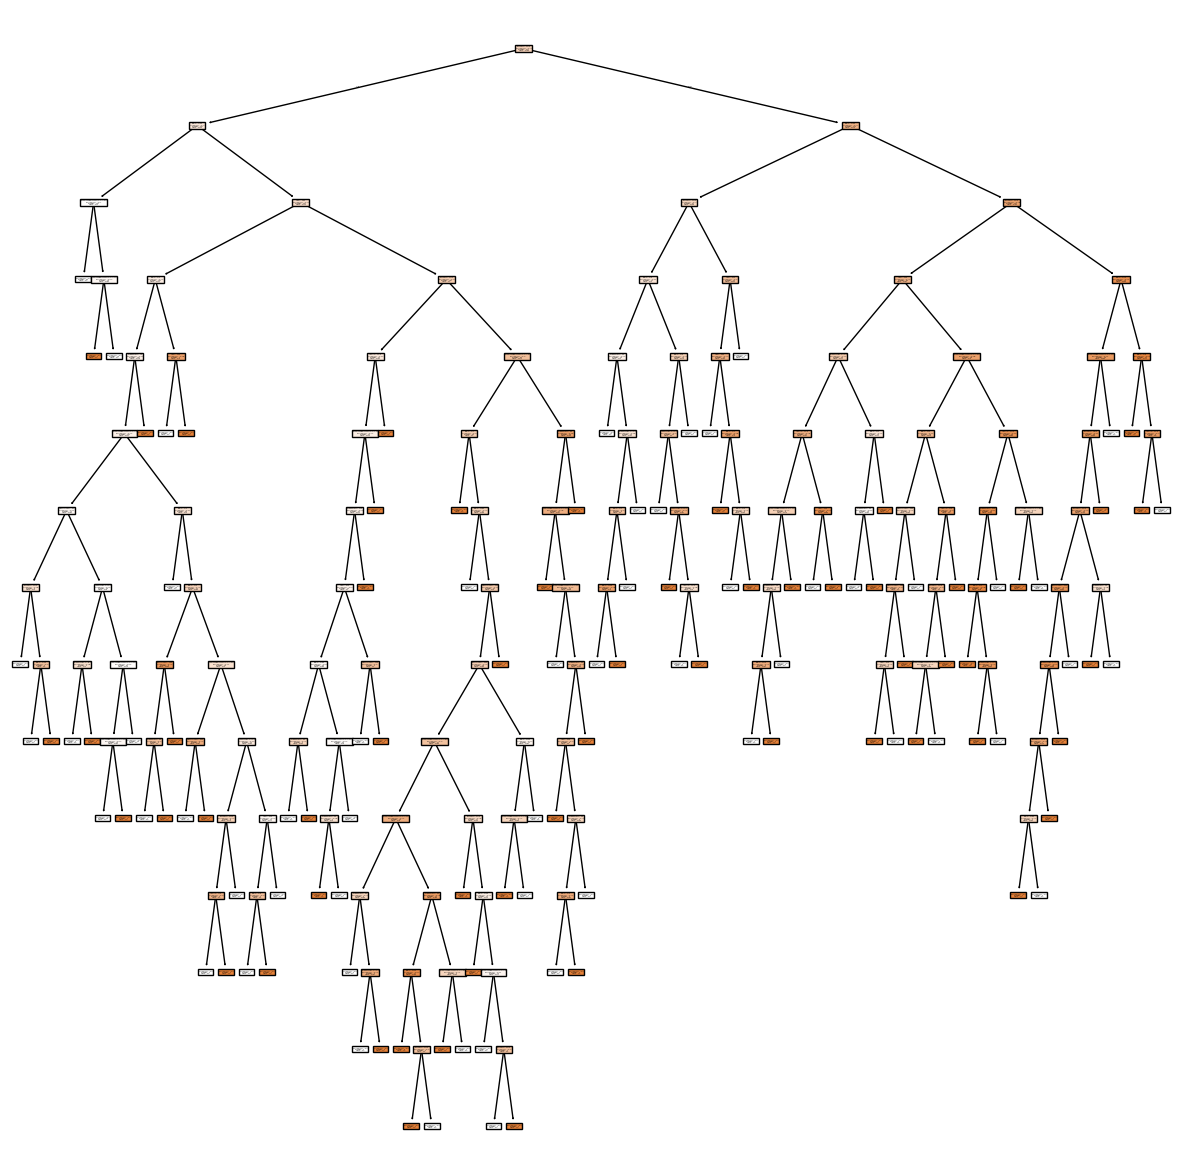

In [21]:
from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [22]:
y_pred = model.predict(X_test)
y_pred

array([0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0.,
       1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 1., 1.])

In [23]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7172413793103448

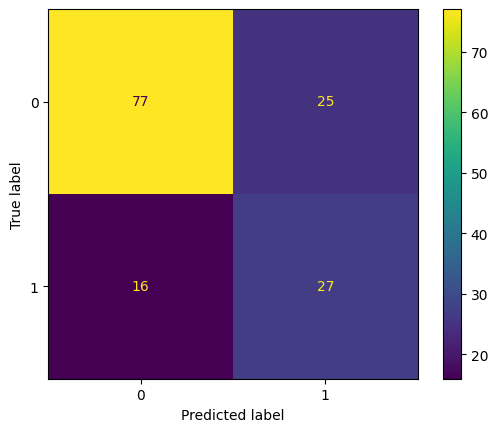

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

CM = confusion_matrix(y_test, y_pred)

graph = ConfusionMatrixDisplay(confusion_matrix = CM)

graph.plot()
plt.show()

In [25]:
from sklearn.model_selection import GridSearchCV

hyperparams = {
    #"criterion": ["gini", "entropy", "log_loss"],
    "criterion": ['poisson', 'absolute_error', 'squared_error', 'friedman_mse','log_loss'],
    "max_depth": [None, 5, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": [None, "sqrt", "log2"]
}

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)
grid

,estimator,DecisionTreeR...ndom_state=42)
,param_grid,"{'criterion': ['poisson', 'absolute_error', ...], 'max_depth': [None, 5, ...], 'max_features': [None, 'sqrt', ...], 'min_samples_leaf': [1, 2, ...], ...}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'squared_error'


In [26]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)
print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'criterion': 'absolute_error', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [27]:
model_grid = DecisionTreeRegressor(criterion = 'absolute_error', max_depth = 5, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 2)
model_grid.fit(X_train, y_train)
y_pred_ = model_grid.predict(X_test)

grid_accuracy = accuracy_score(y_test, y_pred_)
grid_accuracy

0.7448275862068966

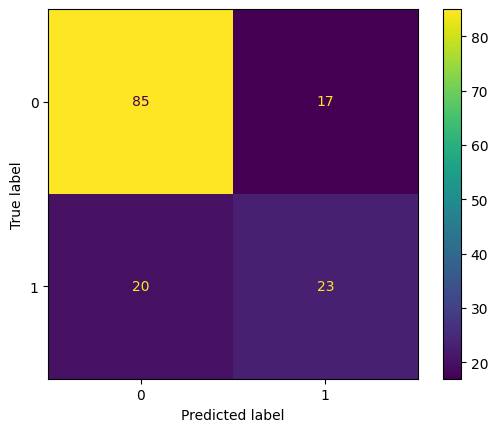

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

CM = confusion_matrix(y_test, y_pred_)

graph = ConfusionMatrixDisplay(confusion_matrix = CM)

graph.plot()
plt.show()

In [31]:
from sklearn.metrics import mean_squared_error as mse

print(f"Mean squared error: {mse(y_test, y_pred)}")

Mean squared error: 0.2827586206896552


In [30]:
from sklearn.metrics import mean_squared_error as mse

print(f"Mean squared error: {mse(y_test, y_pred_)}")

Mean squared error: 0.25517241379310346


In [33]:
from pickle import dump 

dump(model, open("decision_tree_regressor_default_42.sav", "wb"))